In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
os.listdir('/content/custom_data')

['data.yaml',
 'README.dataset.txt',
 'test',
 'README.roboflow.txt',
 'train',
 'valid']

In [ ]:
from ultralytics import YOLO

# Load base model (nano is fastest, small is more accurate, etc.)
model = YOLO('yolov8n.pt')  # Or yolov8s.pt/yolov8m.pt/yolov8l.pt

# Train model
results = model.train(
    data='/content/custom_data/data.yaml',  # path to your data.yaml
    epochs=30,                               # change as needed
    imgsz=416,                                # image size
    batch=10                                  # batch size, tune for Colab RAM
)

# Step 6: Validate on test set
metrics = model.val(data='/content/custom_data/data.yaml')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.5±2.1 MB/s, size: 37.0 KB)


train: Scanning /content/custom_data/train/labels... 252 images, 3 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 444.63it/s]

train: New cache created: /content/custom_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 153.9±184.9 MB/s, size: 35.1 KB)


val: Scanning /content/custom_data/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 720.36it/s]

val: New cache created: /content/custom_data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.286      2.721      1.608         28        416: 100%|██████████| 26/26 [01:06<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         18        486      0.801      0.514      0.681      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/30         0G      1.683      1.274      1.217        119        416: 100%|██████████| 26/26 [01:04<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         18        486      0.771      0.829      0.854      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/30         0G      1.592      1.054      1.198         59        416: 100%|██████████| 26/26 [01:06<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        486      0.812      0.853      0.896       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/30         0G      1.493     0.9602      1.153         69        416: 100%|██████████| 26/26 [01:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         18        486      0.828      0.795      0.875      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.503     0.9346      1.147         57        416: 100%|██████████| 26/26 [01:04<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         18        486      0.826      0.895       0.92      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/30         0G      1.449     0.9306      1.151        125        416: 100%|██████████| 26/26 [01:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        486      0.915      0.916      0.957       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/30         0G      1.418     0.8864      1.137         72        416: 100%|██████████| 26/26 [01:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        486      0.909      0.926      0.958      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/30         0G      1.376     0.8679      1.119         61        416: 100%|██████████| 26/26 [01:06<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        486      0.909      0.941      0.967      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/30         0G      1.319      0.834      1.098         90        416: 100%|██████████| 26/26 [01:05<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        486      0.938      0.934      0.969      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/30         0G      1.344     0.8258      1.105        112        416: 100%|██████████| 26/26 [01:05<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        486      0.891      0.945      0.958      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/30         0G      1.278     0.8128      1.086        114        416: 100%|██████████| 26/26 [01:05<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all         18        486      0.934      0.922      0.973      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/30         0G      1.259     0.8135      1.102         73        416: 100%|██████████| 26/26 [01:03<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all         18        486      0.938      0.949      0.974      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/30         0G      1.286     0.8017      1.073         87        416: 100%|██████████| 26/26 [01:04<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         18        486      0.942       0.94      0.971      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.232     0.7558       1.07         64        416: 100%|██████████| 26/26 [01:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        486      0.907      0.962      0.975      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/30         0G      1.249     0.7766      1.068         97        416: 100%|██████████| 26/26 [01:04<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        486      0.918      0.959      0.975      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/30         0G      1.237     0.7643      1.081         49        416: 100%|██████████| 26/26 [01:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         18        486      0.933      0.953      0.971      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/30         0G      1.198     0.7463      1.062         89        416: 100%|██████████| 26/26 [01:07<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all         18        486      0.937      0.955       0.97       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/30         0G      1.254     0.7476      1.071         70        416: 100%|██████████| 26/26 [01:05<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         18        486      0.914      0.969      0.977      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/30         0G      1.224     0.7391      1.074         60        416: 100%|██████████| 26/26 [01:04<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18        486      0.941      0.957      0.975      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/30         0G      1.199     0.7228      1.055         69        416: 100%|██████████| 26/26 [01:05<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        486      0.938      0.959       0.98      0.675
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      21/30         0G      1.121     0.7344      1.076         32        416: 100%|██████████| 26/26 [00:56<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         18        486      0.958       0.94      0.978      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      22/30         0G      1.121     0.7317      1.068         37        416: 100%|██████████| 26/26 [00:56<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        486      0.921      0.961       0.98      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      23/30         0G      1.099     0.6977      1.086         60        416: 100%|██████████| 26/26 [00:56<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all         18        486      0.945      0.963      0.984      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/30         0G      1.079     0.6699      1.073         54        416: 100%|██████████| 26/26 [00:56<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         18        486      0.933      0.959      0.982      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/30         0G      1.093     0.6784       1.08         44        416: 100%|██████████| 26/26 [00:55<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

                   all         18        486      0.938      0.958      0.981      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      26/30         0G      1.078     0.6756      1.069         57        416: 100%|██████████| 26/26 [00:56<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        486      0.947      0.955      0.983      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/30         0G      1.072     0.6624      1.048         55        416: 100%|██████████| 26/26 [00:59<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all         18        486      0.949      0.951       0.98      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/30         0G      1.047     0.6455      1.049         55        416: 100%|██████████| 26/26 [00:56<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        486      0.949      0.952      0.981      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/30         0G      1.043      0.639      1.057         55        416: 100%|██████████| 26/26 [00:56<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

                   all         18        486      0.946      0.943       0.98      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      30/30         0G      1.041     0.6373      1.045         56        416: 100%|██████████| 26/26 [00:56<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         18        486      0.949      0.948       0.98        0.7

30 epochs completed in 0.535 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


                   all         18        486      0.947      0.956      0.983      0.713
Speed: 0.6ms preprocess, 78.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1142.9±381.3 MB/s, size: 37.2 KB)


val: Scanning /content/custom_data/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


                   all         18        486      0.947      0.956      0.983      0.713
Speed: 0.5ms preprocess, 80.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train2


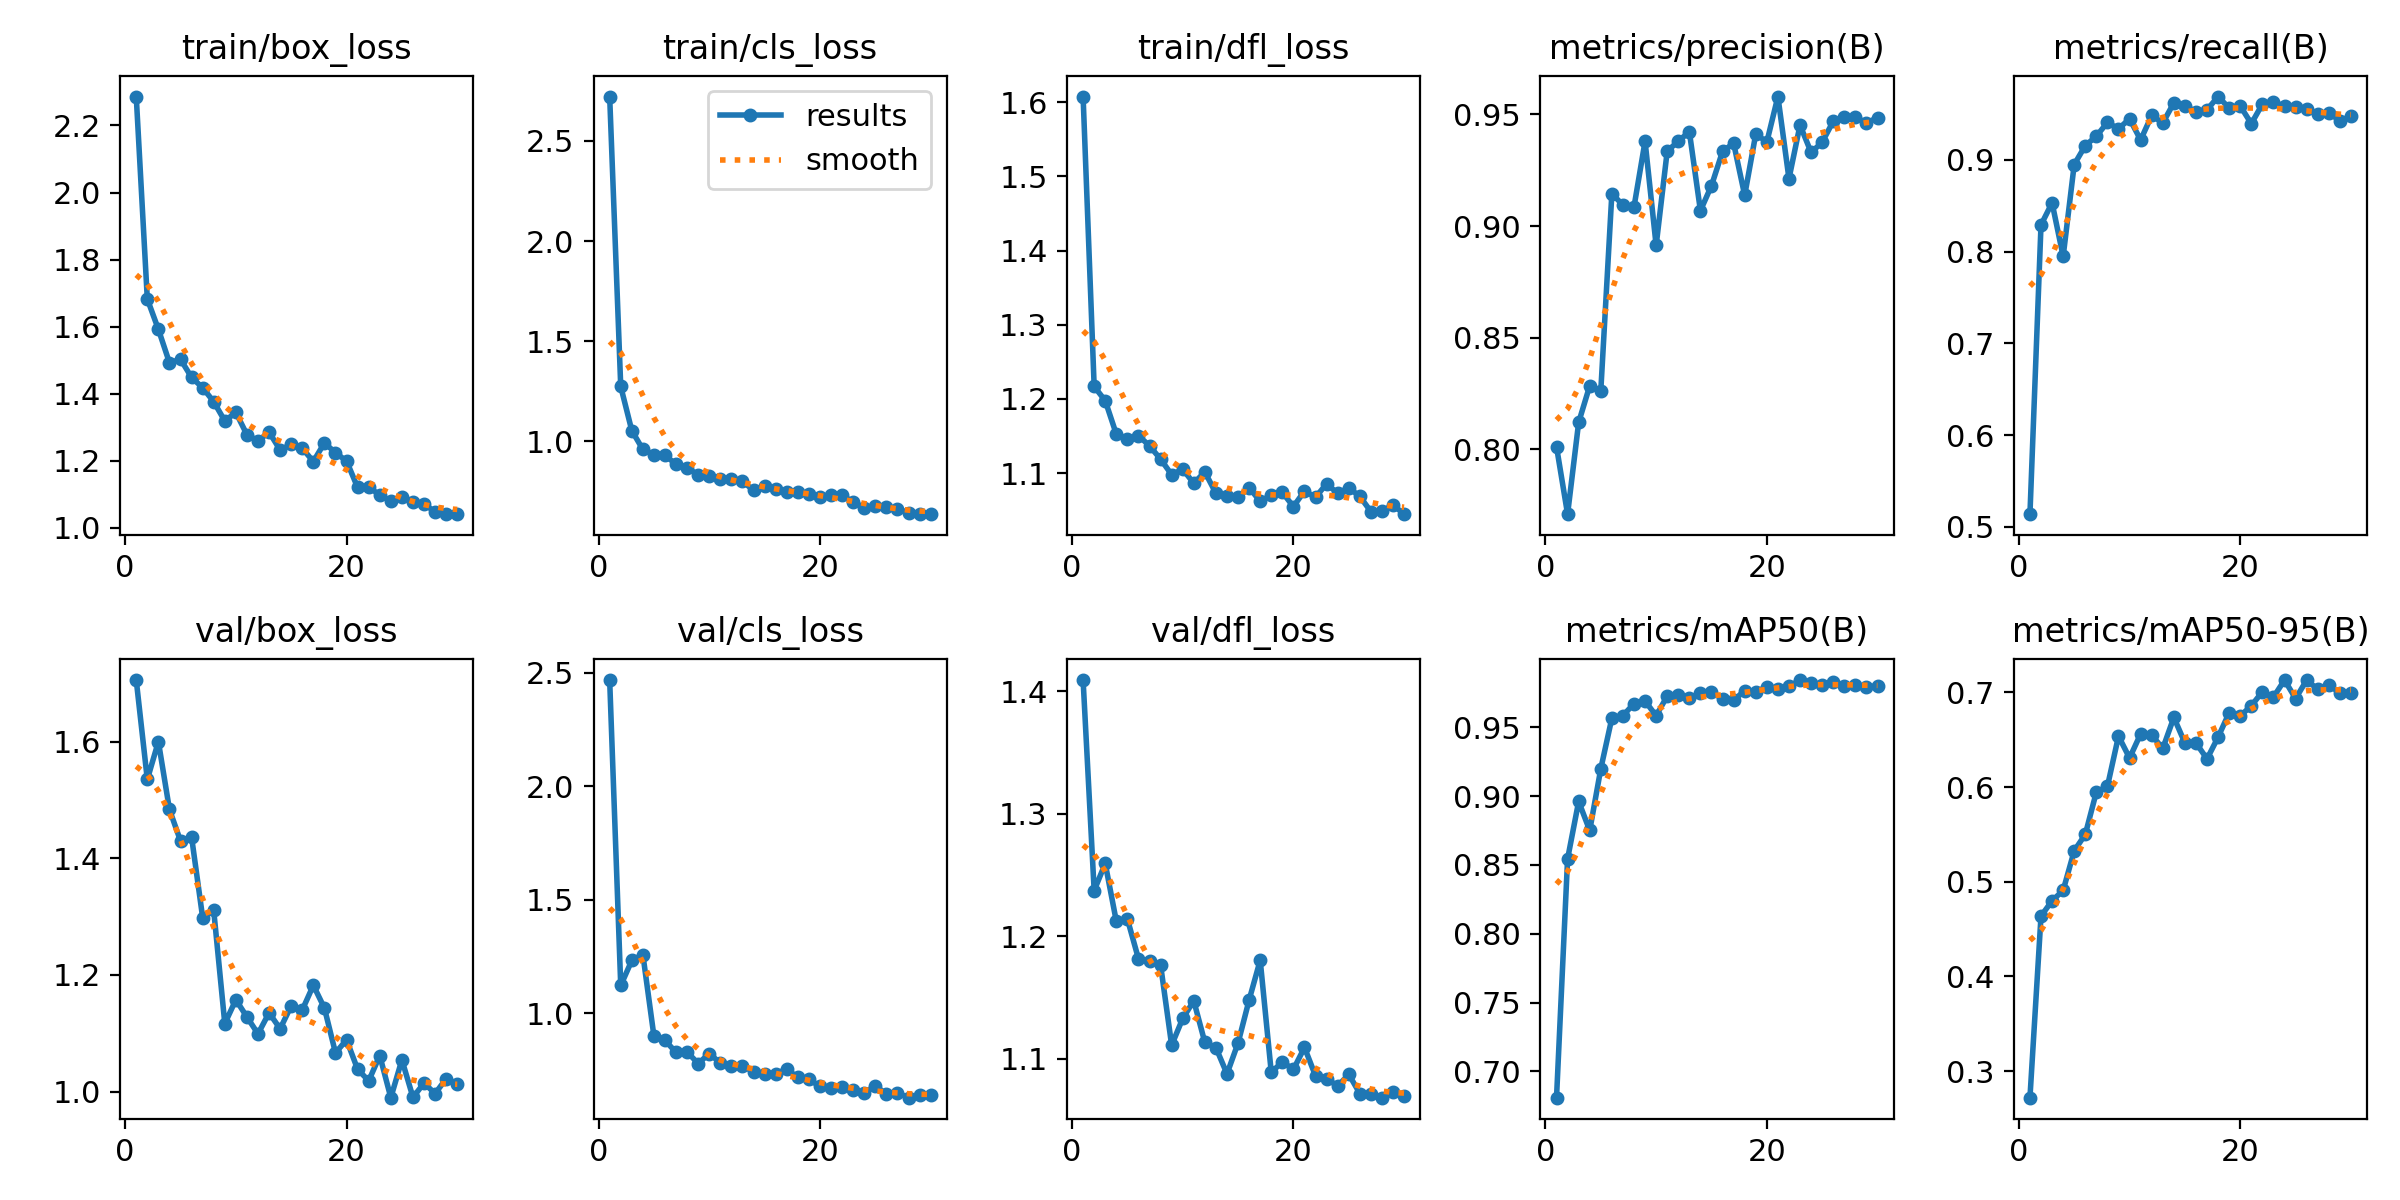

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/train/results.png'))


image 1/1 /content/custom_data/test/images/21_png.rf.dd4a9c51ec9039b930dbdd566403b9bf.jpg: 416x416 23 tooths, 72.4ms
Speed: 2.2ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict9


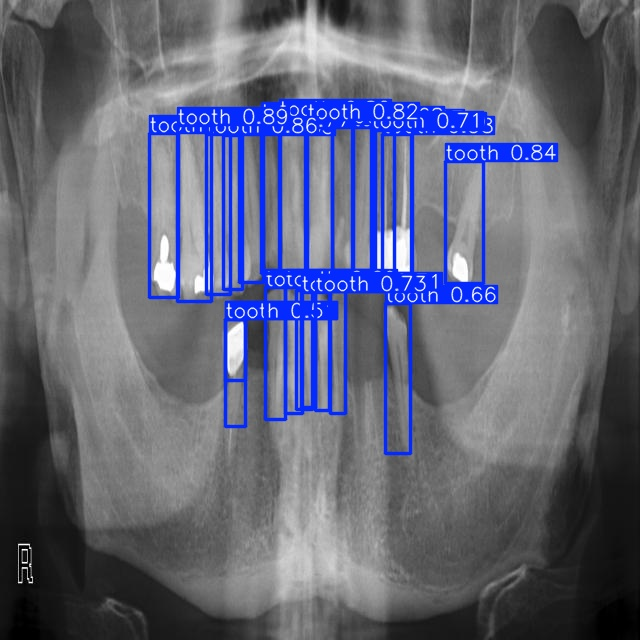

Number of detected teeth: 23


In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')

# Run inference on a test image
results = model.predict('/content/custom_data/test/images/21_png.rf.dd4a9c51ec9039b930dbdd566403b9bf.jpg', save=True)

# The prediction image is saved in runs/detect/predict/
# Display the predicted image
display(Image(filename='runs/detect/predict7/21_png.rf.dd4a9c51ec9039b930dbdd566403b9bf.jpg'))
detected_count = len(results[0].boxes)
print(f"Number of detected teeth: {detected_count}")

In [ ]:
import os
print(os.listdir('runs/detect'))

['predict', 'predict3', 'predict8', 'predict4', 'predict6', 'predict2', 'train', 'predict5', 'predict7', 'train2']
